In [29]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
pd.set_option('display.max_rows', 500)
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
ma_palette = ['#FF8B33', '#BB33FF']
sns.set_palette(ma_palette)

In [30]:
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring="f1", names= "Default"):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Confusion_matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print("Cassification_report : ")
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis= 1), label = 'train score')
    plt.xlabel("Data Set %")
    plt.plot(N, val_score.mean(axis= 1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(names)
    plt.legend()
    plt.show()

In [31]:
files = [file for file in os.listdir("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/cryptos")]
for file in files:
    print(file)
files2 = [file2 for file2 in os.listdir("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/nasdaq")]
for file2 in files2:
    print(file2)

année_2018_flat_DF.csv
année_2021_Oct_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv
année_2018_flat_DF.csv
année_2021_Oct_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv


In [32]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/cryptos/"+file, index_col = [0])
    all_data = pd.concat([all_data, df])
for file2 in files2:
    df = pd.read_csv("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/nasdaq/"+file2, index_col = [0])
    all_data = pd.concat([all_data, df])
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis = 1)

In [33]:
all_data['algo'].value_counts(normalize=True)
# Environ 70 % de nos datas sont des BM, BCRP ou ?Il faudra les garder

BestMarkowitz    0.299145
BCRP             0.264957
?                0.136752
OLMAR            0.085470
CWMR             0.042735
Anticor          0.034188
PAMR             0.034188
BestSoFar        0.025641
CORN             0.025641
ONS              0.025641
BAH              0.017094
RMR              0.008547
Name: algo, dtype: float64

In [34]:
all_data['algo'] = all_data['algo'].replace({"BestMarkowitz": 1, "BCRP": 2, "?": 1,
                                            "OLMAR": 3, "CWMR": 4, "Anticor": 5, "PAMR": 6,
                                            "BestSoFar": 7, "CORN": 8, "ONS": 9,'BAH': 10, "RMR": 11})

In [35]:
all_data['market'] = all_data['market'].replace({'nasdaq': 1, 'cryptos': 0})

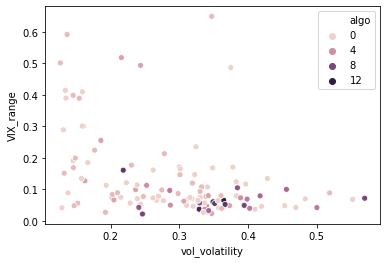

In [40]:
sns.scatterplot(x = 'vol_volatility',y = 'VIX_range', hue = 'algo', data = all_data)
plt.savefig('VIX_Range_Volume_volatility_11Algos.jpg')